In [53]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [84]:
data = pd.read_csv("/Users/taimur/Documents/DataSets/Kepler/exoTrain.csv")

In [86]:
data = data.iloc[:,1:]

In [87]:
labels = data.iloc[:,0]

In [88]:
const = data.iloc[:,1:]

In [89]:
constSTD = StandardScaler().fit_transform(const)

In [90]:
pca = PCA(n_components=2)
constPCA = pca.fit_transform(constSTD)

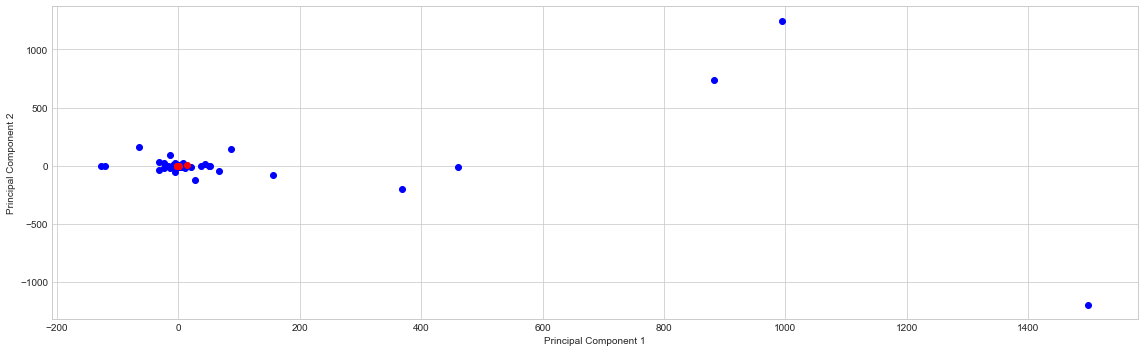

In [91]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 5))
    for lab, col in zip((1, 2),
                        ('blue', 'red')):
        plt.scatter(constPCA[labels==lab, 0],
                    constPCA[labels==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.tight_layout()
    plt.show()

In [60]:
#testing out the min_max_scaler function, turns out the data has to be first transposed for row normalisation
X = np.array([[1, -1, 2],
              [2,  0, 0],
              [0, 1, -1]])
X = np.transpose(X)
print(X)
mms = preprocessing.MinMaxScaler()
print(np.transpose(mms.fit_transform(X)))

[[ 1  2  0]
 [-1  0  1]
 [ 2  0 -1]]
[[ 0.66666667  0.          1.        ]
 [ 1.          0.          0.        ]
 [ 0.5         1.          0.        ]]


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [61]:
constT = np.transpose(const)

In [62]:
mms = preprocessing.MinMaxScaler()
constNorm = np.transpose(mms.fit_transform(constT))

In [63]:
pca = PCA(n_components=2)
constPCA_2 = pca.fit_transform(constNorm)

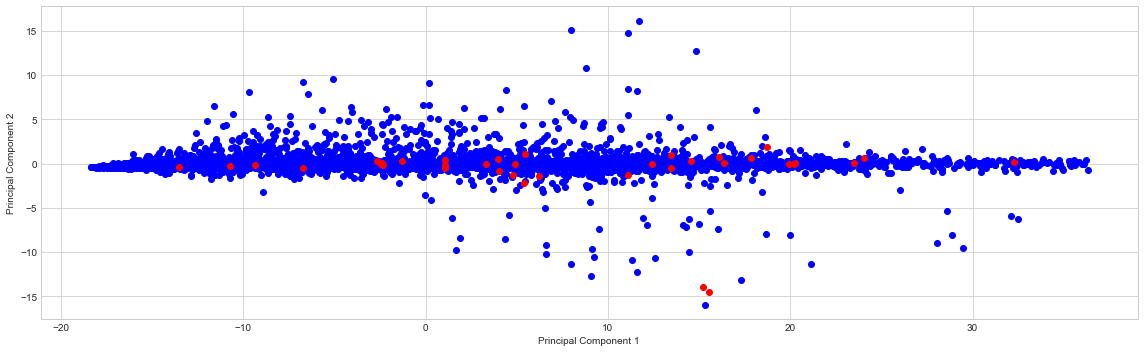

In [77]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 5))
    for lab, col in zip((1, 2),
                        ('blue', 'red')):
        plt.scatter(constPCA_2[labels==lab, 0],
                    constPCA_2[labels==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.tight_layout()
    plt.show()